# Question 1

## Imports

In [1]:
import IPython
import numpy as np
import wave
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

## File

In [2]:
aud_1 = wave.open("signal_1.wav")
aud_2 = wave.open("signal_2.wav")
aud_3 = wave.open("signal_3.wav")

In [3]:
aud_1.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [4]:
aud_1_raw = aud_1.readframes(-1)
signal_1 = np.fromstring(aud_1_raw,'Int16')
aud_2_raw = aud_2.readframes(-1)
signal_2 = np.fromstring(aud_2_raw,'Int16')
aud_3_raw = aud_3.readframes(-1)
signal_3= np.fromstring(aud_3_raw,'Int16')

In [5]:
signal_1[:200]

array([-23, -16, -28, -11, -25, -15, -14, -19, -10, -17, -13,  -8, -16,
        -8, -14,  -9,  -9, -14,  -6, -16,  -1, -21,   0, -21,  -5, -13,
       -12, -10, -13, -13, -13, -13, -17, -11, -19, -13, -18, -21, -13,
       -27, -13, -25, -21, -25, -21, -28, -20, -35, -17, -38, -19, -34,
       -25, -30, -23, -32, -24, -29, -25, -19, -28, -15, -27, -14, -20,
       -14, -17,  -9, -15,  -8,  -9, -10,  -1, -11,   3, -13,   7,  -7,
         0,   5,  -8,  10, -10,  15, -12,  16,  -9,   9,   1,   1,   4,
         0,   1,   7,  -2,   6,  -1,   3,   2,   0,   0,   0,   0,  -1,
        -2,  -3,  -6,   0,  -8,  -7,  -6, -11,  -5,  -8, -17,  -5, -20,
       -10, -14, -19, -13, -21, -16, -22, -20, -24, -20, -26, -24, -26,
       -25, -25, -32, -25, -27, -27, -30, -25, -36, -20, -35, -22, -32,
       -24, -33, -23, -30, -28, -26, -27, -29, -24, -30, -22, -29, -23,
       -30, -18, -32, -18, -28, -21, -24, -21, -23, -20, -25, -17, -27,
       -11, -33, -10, -32, -15, -29, -16, -28, -19, -26, -24, -2

### Plotting

(-35000.0, 35000.0)

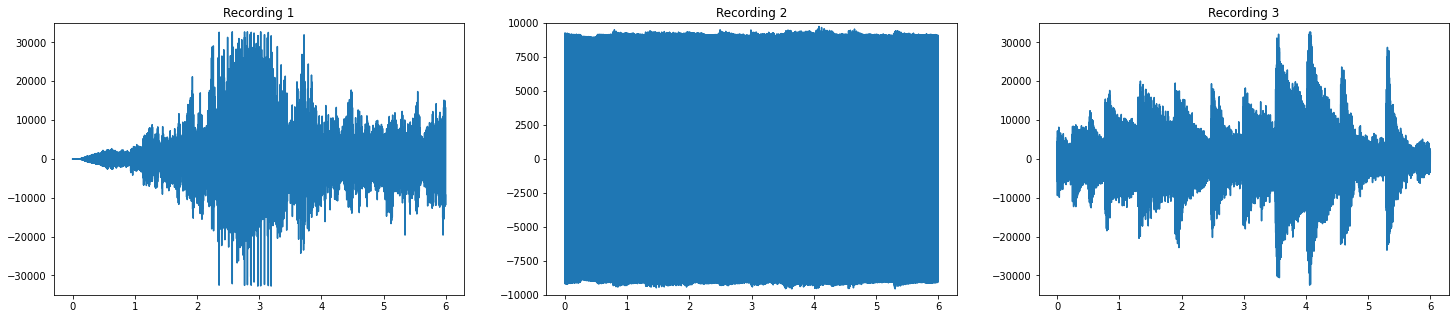

In [6]:


plt.figure(figsize=(25,5))


fs1 = aud_1.getframerate()
timing1 = np.linspace(0, len(signal_1)/fs1, num=len(signal_1))
plt.subplot(1,3,1)
plt.title('Recording 1')
plt.plot(timing1,signal_1)
plt.ylim(-35000, 35000)

fs2 = aud_2.getframerate()
timing2 = np.linspace(0, len(signal_2)/fs2, num=len(signal_2))
plt.subplot(1,3,2)
plt.title('Recording 2')
plt.plot(timing2,signal_2)
plt.ylim(-10000, 10000)

fs3 = aud_3.getframerate()
timing3 = np.linspace(0, len(signal_3)/fs3, num=len(signal_3))
plt.subplot(1,3,3)
plt.title('Recording 3')
plt.plot(timing3,signal_3)
plt.ylim(-35000, 35000)

### listening

In [7]:
IPython.display.Audio('signal_3.wav')

### Merging

In [8]:
x = list(zip(signal_1,signal_2,signal_3))
x

[(-23, -52, 2142),
 (-16, -624, 2328),
 (-28, -1178, 2010),
 (-11, -1740, 1989),
 (-25, -2282, 1671),
 (-15, -2827, 1605),
 (-14, -3351, 1344),
 (-19, -3870, 1262),
 (-10, -4370, 1066),
 (-17, -4856, 976),
 (-13, -5321, 833),
 (-8, -5769, 808),
 (-16, -6192, 718),
 (-8, -6594, 741),
 (-14, -6969, 693),
 (-9, -7319, 762),
 (-9, -7640, 797),
 (-14, -7931, 890),
 (-6, -8194, 976),
 (-16, -8421, 1096),
 (-1, -8620, 1206),
 (-21, -8780, 1317),
 (0, -8912, 1453),
 (-21, -9002, 1529),
 (-5, -9062, 1656),
 (-13, -9083, 1722),
 (-12, -9071, 1820),
 (-10, -9022, 1914),
 (-13, -8938, 2007),
 (-13, -8819, 2092),
 (-13, -8665, 2203),
 (-13, -8480, 2304),
 (-17, -8259, 2428),
 (-11, -8009, 2543),
 (-19, -7725, 2690),
 (-13, -7415, 2850),
 (-18, -7071, 3025),
 (-21, -6706, 3167),
 (-13, -6311, 3379),
 (-27, -5892, 3512),
 (-13, -5453, 3700),
 (-25, -4988, 3852),
 (-21, -4506, 4006),
 (-25, -4008, 4146),
 (-21, -3492, 4281),
 (-28, -2962, 4371),
 (-20, -2423, 4457),
 (-35, -1869, 4505),
 (-17, -1313, 

## Fast ICA

In [9]:
ica = FastICA(n_components=3)
result = ica.fit_transform(x)
result

array([[-1.57585829e-05,  6.54763292e-04, -6.42010060e-07],
       [-1.90321321e-04,  7.11615990e-04,  1.10796707e-06],
       [-3.59436264e-04,  6.14568802e-04, -1.98251850e-06],
       ...,
       [-1.93749723e-03,  3.69159687e-04, -2.74354972e-03],
       [-2.05981129e-03,  3.79585693e-04, -2.80267973e-03],
       [-2.17532211e-03,  5.08014622e-04, -2.84450399e-03]])

In [10]:
result.shape

(264515, 3)

### splitting

In [11]:
result_signal_1 = result[:,0]
result_signal_2 = result[:,1]
result_signal_3 = result[:,2]

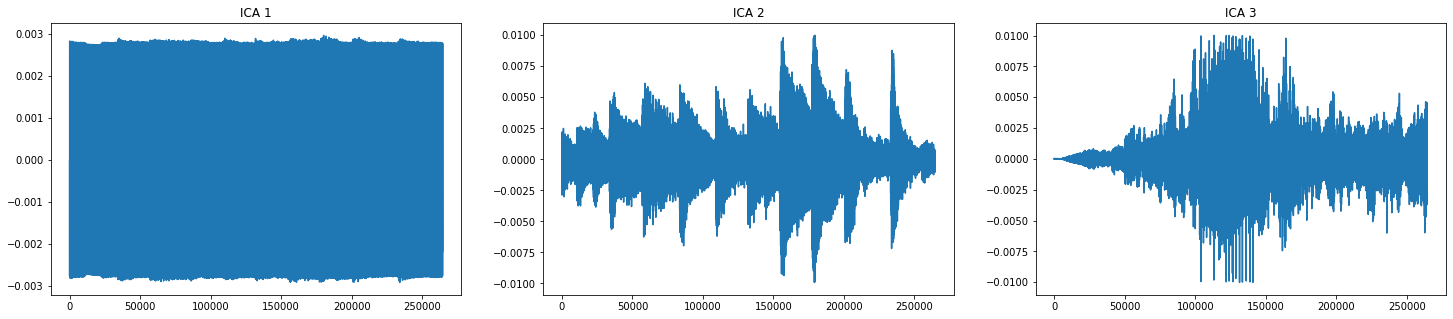

In [12]:
plt.figure(figsize=(25,5))


plt.subplot(1,3,1)
plt.title('ICA 1')
plt.plot(result_signal_1)

plt.subplot(1,3,2)
plt.title('ICA 2')
plt.plot(result_signal_2)


plt.subplot(1,3,3)
plt.title('ICA 3')
plt.plot(result_signal_3)

# Question 2

## Imports

In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

## File

In [14]:
train = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')

In [15]:
train = train.drop(['Unnamed: 0'],axis = 1)
test=test.drop(['Unnamed: 0'],axis = 1)

In [16]:
train.head(2)
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [17]:
cat_cols = ['Gender','Customer Type','Type of Travel','Class','satisfaction']
le = LabelEncoder()

for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    test[col]  = le.fit_transform(test[col])

In [18]:
x_train = train.drop(['satisfaction'],axis=1)
x_test = test.drop(['satisfaction'],axis=1)
y_train = train['satisfaction']
y_test = test['satisfaction']

## SFS

In [19]:
dt_clf = DecisionTreeClassifier(random_state=42)
sfs = SFS(dt_clf, 
           k_features=10, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           )
sfs =sfs.fit(x_train,y_train)

### Important features

In [20]:
sfs.subsets_

{1: {'feature_idx': (22,),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('Arrival Delay in Minutes',)},
 2: {'feature_idx': (0, 22),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('id', 'Arrival Delay in Minutes')},
 3: {'feature_idx': (0, 1, 22),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('id', 'Gender', 'Arrival Delay in Minutes')},
 4: {'feature_idx': (0, 1, 2, 22),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('id',
   'Gender',
   'Customer Type',
   'Arrival Delay in Minutes')},
 5: {'feature_idx': (0, 1, 2, 3, 22),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('id',
   'Gender',
   'Customer Type',
   'Age',
   'Arrival Delay in Minutes')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 22),
  'cv_scores': array([nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names'

In [21]:
print("The most important features are")
sfs.subsets_[10]['feature_names']

The most important features are


('id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Arrival Delay in Minutes')